## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [3]:
SN_ADS= pd.read_csv('Social_Network_Ads.csv')

In [4]:
SN_ADS.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
SN_ADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [9]:
SN_ADS.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
SN_ADS['Purchased']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
      ..
370    1
371    1
372    0
373    1
374    0
375    1
376    0
377    0
378    1
379    1
380    0
381    1
382    1
383    1
384    1
385    1
386    1
387    0
388    1
389    1
390    1
391    1
392    1
393    1
394    0
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Deciding Kernel

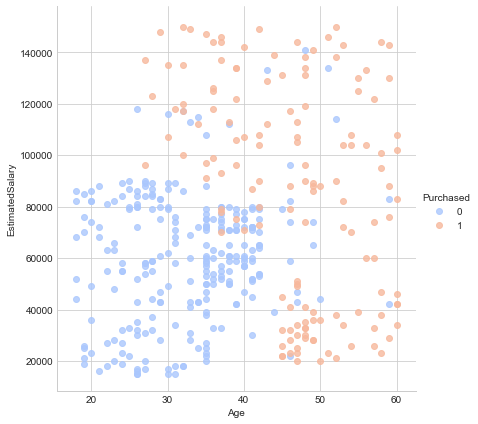

In [42]:
sns.set_style('whitegrid')
sns.lmplot('Age','EstimatedSalary',data=SN_ADS, hue='Purchased',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

This type of plot can be classifeid using Guassian Kernel(RBF)

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [16]:
X = SN_ADS[['Age','EstimatedSalary']]
y = SN_ADS['Purchased']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Support Vector Classifier

In [26]:
from sklearn.svm import SVC

In [27]:
model = SVC()

In [28]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations

In [29]:
predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,predictions))

[[73  7]
 [ 1 39]]


In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.91      0.95        80
          1       0.85      0.97      0.91        40

avg / total       0.94      0.93      0.93       120



# Visualising the Training set results

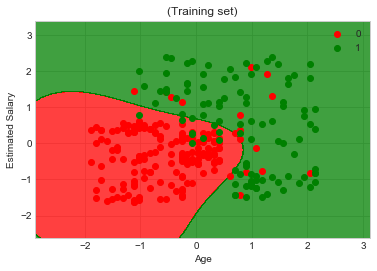

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

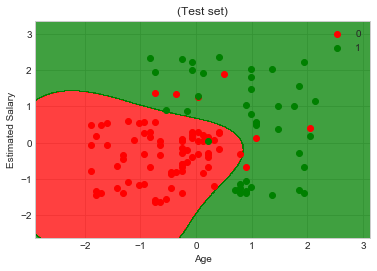

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()